HISTOGRAM EQUALISATION

In [15]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np
import math

In [16]:
path=r'D:/Study/Python/openCV/College/res/'

In [17]:
def show_img(img):
    fig=plt.figure(figsize=(5,5))
    ax=fig.add_subplot(111)
    ax.imshow(img,'gray')

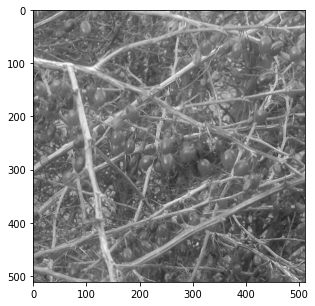

In [18]:
img=cv2.imread(path+'low_contrast.bmp',0)
HCimg=np.zeros(img.shape,'uint8')
show_img(img)
height,width=img.shape
MN=height*width

In [19]:
Nk = cv2.calcHist([img],[0],None,[256],[0,256]) #Calculated histogram

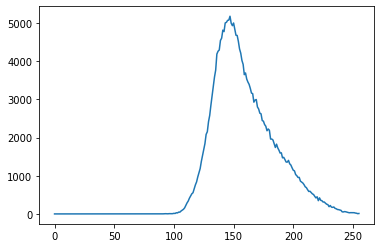

In [20]:
plt.plot(Nk)

In [21]:
def Pr_rk(r): # Probability of occurance of intensity level rk
    return Nk[r]/MN

def Sk(r): # Remapped r, Sk=255*summ(Pr_rk)
    sum=0
    for i in range(r):
        sum+=Pr_rk(i)
    return sum*255

In [22]:
new_r=np.zeros(256)
for i in range(256):
    new_r[i]=np.round(Sk(i))

In [23]:
new_rk={} # Creating a map(dictionary) for new rk values
for i in range(256):
    new_rk[i]=new_r[i]

In [24]:
for k,v in new_rk.items():
    HCimg[img==k]=v

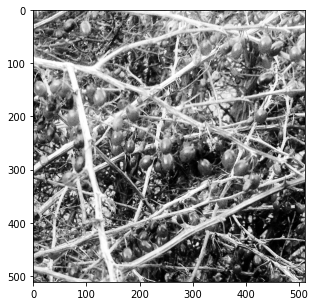

In [25]:
show_img(HCimg)

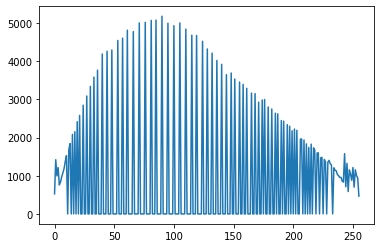

In [26]:
plt.plot(cv2.calcHist([HCimg],[0],None,[256],[0,256]))